In [18]:
import numpy as np
import pandas as pd
import os, sys
sys.path.append('../src/data/')
import data_preprocessing_from_yahoo_finance as dp
import matplotlib.pyplot as plt

In [16]:
result_np = dp.data_preprocessing_1(ticker_list_input=['AAPL', 'PG'], path='../data/raw/')
result_np.shape

working on AAPL
working on PG


(4, 2519, 2)

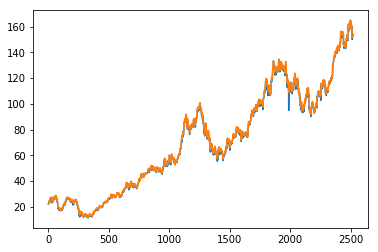

In [25]:
plt.plot(result_np[0,:,0])
plt.plot(result_np[1,:,0])
# plt.plot(result_np[2])
# plt.plot(result_np[3])
plt.show()

In [1011]:
class env():
    def __init__(self, result_np, total_steps=100):
        self.step = 0 # start from step 0
        self.total_steps = total_steps # how many days to trade on
        self.price_window = int(result_np.shape[1]-self.total_steps) # How many data points to look at in each step
        self.comission_rate = 0.05
        
        # Initialize Price Tensor
        self.cash_price = np.ones(result_np.shape[0:2])
        self.all_prices = np.concatenate((self.cash_price[:,:,None], result_np), axis=2) 
        self.all_prices_normalized = self.all_prices[:,1:,:]/self.all_prices[:,:-1,:]
        
        # Backtest
        self.portfolio_size = []
        self.portfolio_return = []
        self.sharpe_ratio = 0
    
    def reset(self):
        weight = np.zeros(result_np.shape[2]+1) # initial weight
        weight[0] = 1
        self.step = 0 
        start_prices = self.all_prices_normalized[:,self.step:self.step+self.price_window,:]
        step_portfolio_size = np.sum(weight*start_prices[3,-1,:]) # Assume trade on closing price of the next trading day 
        self.portfolio_size.append(step_portfolio_size)
        return weight, start_prices, step_portfolio_size

    def next_step(self, weight):
        self.step += 1 
        next_prices = self.all_prices_normalized[:,self.step:self.step+self.price_window,:]
        step_portfolio_size = np.sum(weight*next_prices[3,-1,:]) # Assume trade on closing price of the next trading day

        if self.step == self.total_steps+1:
            self.end_game()
            return False
        
        self.portfolio_size.append(step_portfolio_size)
        self.portfolio_return.append((step_portfolio_size - self.portfolio_size[-2])/self.portfolio_size[-2])
        return weight, next_prices, step_portfolio_size
    
    def end_game(self):
        expected_return = np.mean(self.portfolio_return)
        std_return = np.std(self.portfolio_return)
        self.sharpe_ratio = expected_return / std_return
        
c = env(result_np)
r = c.reset()
print(sum(r[0]),
    r[1].shape,
    r[2])
  # w_list[:,1]

1.0 (4, 2419, 3) 1.0


step: 0 : 1.0 (4, 2419, 3) 1.0
step: 10 : 1.0 (4, 2419, 3) 0.9986528490945864
step: 20 : 1.0 (4, 2419, 3) 0.996616100142545
step: 30 : 1.0 (4, 2419, 3) 0.9981741190739882
step: 40 : 1.0 (4, 2419, 3) 1.0077204720571042
step: 50 : 1.0 (4, 2419, 3) 0.9996874962122339
step: 60 : 1.0 (4, 2419, 3) 1.0034087761850936
step: 70 : 1.0 (4, 2419, 3) 0.9990721080845378
step: 80 : 1.0 (4, 2419, 3) 1.0006644748758884
step: 90 : 1.0 (4, 2419, 3) 0.9944234953073101
step: 100 : 1.0 (4, 2418, 3) 1.0040472738680868
end of episode sharpe ratio: 0.009517939921379778


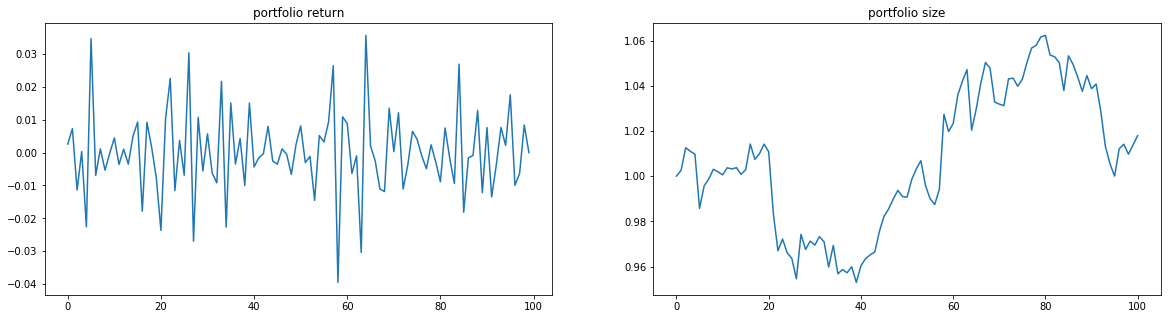

In [1012]:
c = env(result_np)
r = c.reset()
print('step:',c.step,':',sum(r[0]),
    r[1].shape,
    r[2])
while r !=False:
    r = c.next_step(w_list[:,i])
    if c.step%10==0:
        print('step:',c.step,':',sum(r[0]),
        r[1].shape,
        r[2])
else:
    print('end of episode', 'sharpe ratio:', c.sharpe_ratio)

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
ax1.plot(c.portfolio_return)
ax1.set_title('portfolio return')

ax2.plot(np.cumprod(c.portfolio_size))
ax2.set_title('portfolio size')
plt.show()

step: 0 : 1.0 (4, 2419, 3) 1.0
step: 10 : 1 (4, 2419, 3) 0.9970090591369339
step: 20 : 1 (4, 2419, 3) 0.9975542921029454
step: 30 : 1 (4, 2419, 3) 0.9983547662822488
step: 40 : 1 (4, 2419, 3) 1.0101590204697415
step: 50 : 1 (4, 2419, 3) 0.9995344414850698
step: 60 : 1 (4, 2419, 3) 1.0052708878757122
step: 70 : 1 (4, 2419, 3) 0.9977194944320306
step: 80 : 1 (4, 2419, 3) 1.0003048966570598
step: 90 : 1 (4, 2419, 3) 0.9924317821058731
step: 100 : 1 (4, 2418, 3) 1.005480143166625
end of episode sharpe ratio: 0.011918579058330459


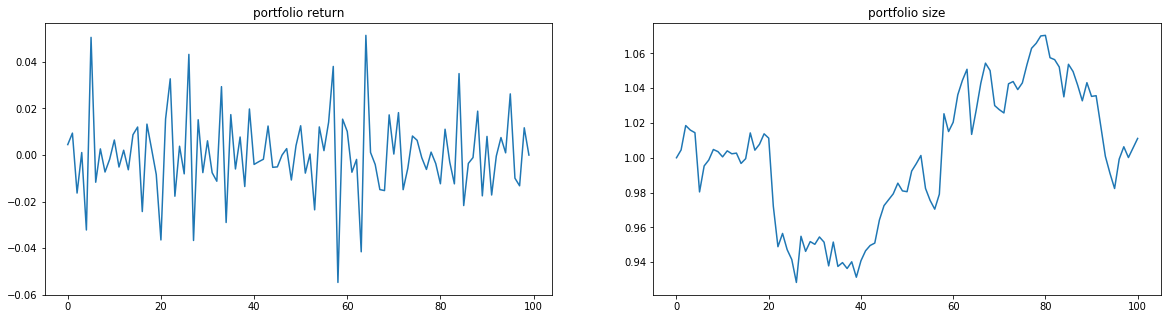

In [1018]:
c = env(result_np)
r = c.reset()
print('step:',c.step,':',sum(r[0]),
    r[1].shape,
    r[2])
while r !=False:
    r = c.next_step([0,1,0]) # Alocate only to asset 1 [0,1,0]
    if c.step%10==0:
        print('step:',c.step,':',sum(r[0]),
        r[1].shape,
        r[2])
else:
    print('end of episode', 'sharpe ratio:', c.sharpe_ratio)

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
ax1.plot(c.portfolio_return)
ax1.set_title('portfolio return')

ax2.plot(np.cumprod(c.portfolio_size))
ax2.set_title('portfolio size')
plt.show()

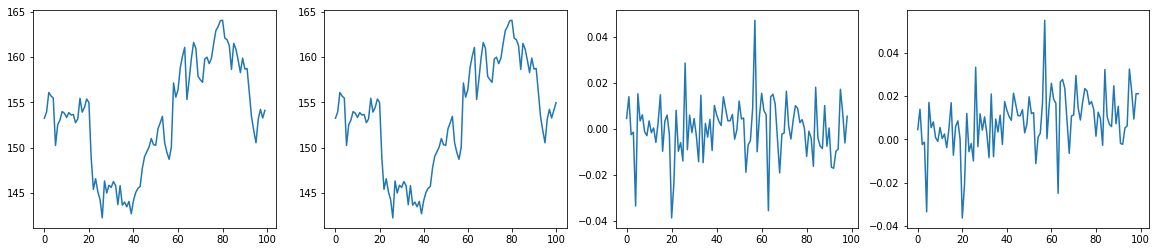

<Figure size 720x360 with 0 Axes>

In [973]:
# Check whether the single asset portfolio is correctly calculated by env
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
plt.figure(figsize=(10,5))
portfolio_size = c.all_prices[3,-100:,1]
ax1.plot(portfolio_size)
ax2.plot(np.cumprod(c.portfolio_size)*portfolio_size[0])

ax3.plot((c.all_prices[3,-99:,1] - c.all_prices[3,-100:-1,1])/c.all_prices[3,-100:-1,1])
ax4.plot(np.cumsum(c.portfolio_return))
plt.show()


100 100


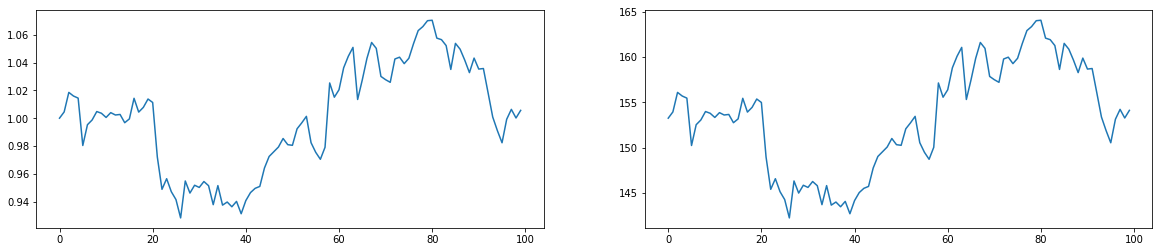

In [1046]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

a = np.cumprod(c.portfolio_size[:-1])
b = (c.all_prices[3,-100:,1])# - c.all_prices[3,-101:-1,1])/c.all_prices[3,-101:-1,1]
ax1.plot(a)
ax2.plot(b)
print(len(a), len(b))

In [1053]:
print(sum(c.portfolio_return))
(c.all_prices[3,-1,1] - c.all_prices[3,-100,1]) / c.all_prices[3,-100,1]

0.02107411546098522


0.005611383538926092

In [1064]:

max(a, key=b)

SyntaxError: invalid syntax (<ipython-input-1064-c169cd7c7430>, line 2)

initial array: [1. 0. 0.]


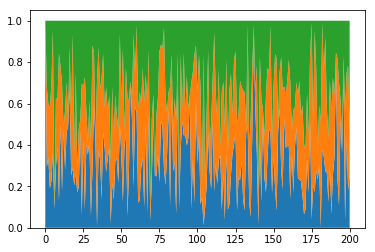

In [765]:
np.random.seed(0)
%matplotlib inline

w_list = np.zeros((3,total_steps+1))
w_list[0,0] = 1
# test by random weights
for i in range(total_steps):
    w = np.random.random(3)
    w = w/np.sum(w)
    w_list[:,i+1] = w
    
print('initial array:',w_list[:,0])
plt.stackplot(range(w_list.shape[1]),w_list[:,:])
plt.show()